# Apocalypse

In the aftermath of a catastrophic event that decimated civilization, you find yourself trapped within the confines of an abandoned suburban community. The streets are deserted, the once-pristine homes now dilapidated shells overrun by the undead. Your haven is a fortified shelter, offering a modicum of safety from the ravenous hordes that roam the ruins. 
<br/> <br/>
Amidst the chaos, you've gained access to a database containing vital information about the survivors scattered throughout the neighboring residences. This database holds the key to your survival, as some of these survivors could become valuable allies in your quest for freedom. 
<br/> <br/>
Your task is to analyze this data and determine which residences harbor survivors that could become valuable allies. However, some residences may be occupied by the undead, posing a grave threat to your safety. 
<br/> <br/>
To complete the challenge, you must use the provided information about people living in there to establish contact with at least 10 human survivors while ensuring you do not contact any undead. Your solution will be represented as a string of `1s` and `0s`, where a `1` indicates `contact with the this person` and a `0` means `do not contct with this person`.
<br/> <br/>
For example, if there were 40 residences, and you wanted to contact with the occupents of the first two, the fourth, the seventh and the nineth residences, your solution would be represented as: `11010010100000000000000000000000000000000`
<br/> <br/>


`Note`: Brute-forcing the solution by trying multiple possibilities won't be an effective approach, as you have a limited number of attempts. You only have `10 lives (attempts)` to submit your solution for this challenge. After exhausting those 10 attempts, you won't be able to submit further solutions. 

## Import necessary libraries

If you have any missing libraries, you can install them by running the following command in your terminal or command prompt (Make sure you have pip installed): `pip install library1 library2`

In [116]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Loading the data

Your are provided with two sets of data: `train_set.csv` and `test_set.csv`, let's upload both of them by reading the CSV files!

In [117]:
# That's how you load a dataset from a CSV file buddy :)

train_set = pd.read_csv('data/train_set.csv') # set used to train the model
test_set = pd.read_csv('data/test_set.csv') # set used to test the model

## Dataset Description

Now, I'll introduce to you some data exploration techniques to understand the data structure!

- Displaying top 5 rows of each set

In [118]:
train_set.head(n=5)

,ID,sex,age,household,rurality,water (l),food,medication,tools,firstaid,sanitation,clothing,documents,status
0,47,Female,32,3,Urban,16,Food,No medication,No tools,No first aid supplies,Sanitation,Clothing,NaN,Human
1,77,Male,42,3,Urban,0,No food,Medication,tools,First aid supplies,Sanitation,Clothing,Documents,Human
2,187,Male,18,3,Urban,0,No food,No medication,No tools,No first aid supplies,Sanitation,Clothing,Documents,Undead
3,179,Female,59,3,Rural,0,No food,No medication,tools,No first aid supplies,No sanitation,Clothing,NaN,Undead
4,195,Female,67,2,Suburban,0,No food,No medication,No tools,No first aid supplies,No sanitation,NaN,NaN,Undead


In [119]:
test_set.head(n=5)

,ID,sex,age,household,rurality,water (l),food,medication,tools,firstaid,sanitation,clothing,documents
0,36,Female,28,1,Rural,0,Food,Medication,tools,No first aid supplies,Sanitation,Clothing,Documents
1,148,Female,64,2,Suburban,0,Food,Medication,No tools,No first aid supplies,No sanitation,Clothing,NaN
2,90,Female,48,2,Suburban,0,Food,Medication,No tools,First aid supplies,No sanitation,Clothing,NaN
3,65,Female,37,4,Rural,40,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
4,165,Male,40,3,Urban,0,No food,No medication,No tools,First aid supplies,No sanitation,Clothing,NaN


You can clearly see that the `test_set` is missing a column labeled `status`. This column represents the target variable that you will be predicting after training your model on the train_set.

- Dataset description

In [120]:
train_set.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          160 non-null    int64 
 1   sex         160 non-null    object
 2   age         160 non-null    int64 
 3   household   160 non-null    int64 
 4   rurality    160 non-null    object
 5   water (l)   160 non-null    int64 
 6   food        160 non-null    object
 7   medication  160 non-null    object
 8   tools       160 non-null    object
 9   firstaid    160 non-null    object
 10  sanitation  160 non-null    object
 11  clothing    103 non-null    object
 12  documents   55 non-null     object
 13  status      160 non-null    object
dtypes: int64(4), object(10)
memory usage: 17.6+ KB


- Display types of columns : numerical or categorial values

In [121]:
train_set.dtypes

ID             int64
sex           object
age            int64
household      int64
rurality      object
water (l)      int64
food          object
medication    object
tools         object
firstaid      object
sanitation    object
clothing      object
documents     object
status        object
dtype: object

- Dataset shape

In [122]:
print(f'Train set shape: {train_set.shape}') 
print(f'Test set shape: {test_set.shape}')

# Output: (rows, columns)

Train set shape: (160, 14)
Test set shape: (40, 13)


- Value counts of our targer column

In [123]:
train_set['status'].value_counts()

status
Human     97
Undead    63
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='status'>

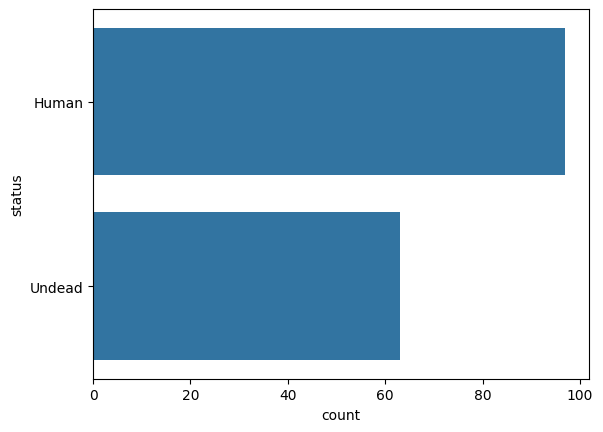

In [124]:
sns.countplot(train_set['status'])

## Dataset Cleaning

In this section we will perform some data cleaning and preprocessing tasks. This is a very important step in the machine learning, as the quality of the data will directly affect the quality of the model.

- Dropping irrelevant columns (columns that have no sense in the data)

In [125]:
# Write a code that drops the 'ID' column from the train_set and test_set


- Checking if there's any missing values (NaN)

In [126]:
train_set.isna().sum()

sex             0
age             0
household       0
rurality        0
water (l)       0
food            0
medication      0
tools           0
firstaid        0
sanitation      0
clothing       57
documents     105
status          0
dtype: int64

- Dropping columns with missing values

In [127]:
# Write a code that drops columns with missing values from the train_set and test_set


- Droping duplicated rows (if there's any)

In [128]:
print(f'Number of duplicated rows in the train set: {train_set.duplicated().sum()}')

Number of duplicated rows in the train set: 0


## Model Training

- Separate features and target column

Now, we need to separate target column (`y`) from other columns (`X`) in the train set, since our model will take (`X, y`) as arguments for training. This separation ensures that the model learns the relationships between the independent variables (`X`) and the dependent variable (`y`)

In [129]:
# Write your code here...


- Encoding the categorical variables

Machine learning models require numerical input, so we need to convert `categorical variables` (sex, food ...etc) into a `numerical format`. This process is known as encoding.

In [130]:
# Write a code that encodes the categorical columns in the train_set and test_set using (LabelEncoder)


- Encoding the target variable

We will also encode the target varibale `status` in the train_set, for that we will assign `0 to Undead` and `1 to Humans`

In [132]:
# Write you code here...


- Logistic Regression Model

In this code snippet, we define a `logistic regression` model. This model is a popular choice for `binary classification` tasks, where the target variable has two possible outcomes. This model calculates the probability that a given input belongs to a particular class and makes predictions based on these probabilities.
`StandardScaler` ensures that all features are on the same scale, which can improve the performance of the logistic regression algorithm.

In [133]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

- Training the model

Now we move to training, you are tasked to train the model that takes `X`, `y` as arguments!

In [1]:
# Write you code here...


- Predict the status values of the test set

Now that we have trained our machine learning model using the training set, the next step is to utilize this trained model to predict the status values of the test set. The test set contains a similar set of features as the training set but lacks the corresponding status values, which are the target variables we aim to predict.

In [135]:
# Calculate the probability of being a human for each row in the test set
proba = model.predict_proba(X_test)[:,1]

# Predecit the status of each row in the test set
prediction = model.predict(X_test)

- Visualization of calculated probabilities

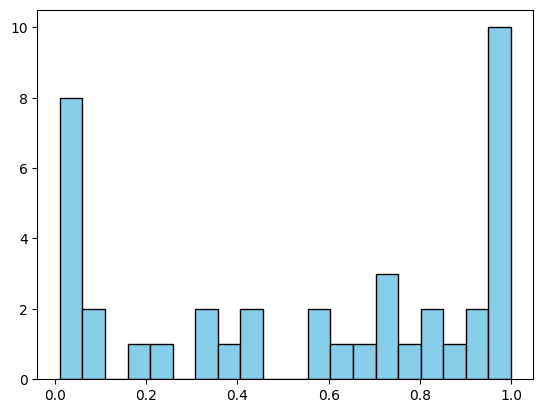

In [136]:
plt.hist(proba, bins=20, color='skyblue', edgecolor='black')
plt.show()

- Create a DataFrame containing predictions and probabilities

In [137]:
test = pd.DataFrame({'prediction': prediction, 'human probability': proba})

## Final destination

After building a model that can predict whether people are humans or undead, you must use this model to decide which individuals you will attempt to establish contact with!  `It's crucial to note that the model's predictions are not 100% accurate, and some misclassifications are inevitable!`
</br></br>
<b>Again, you have to contact with `at least 10 humans and exactly 0 undead` to collect the flag. You do not have to contact with all the humans, `10 is sufficient`.</b>

In [2]:
# Write your code here...
